# September Bear

In [8]:
import datetime as dt
import pandas as pd
import yfinance as yf

import available as avb
import utils as self_utils
from quantified_strategies import strategy_utils as utils

In [9]:
def get_positions(df: pd.DataFrame) -> pd.Series:

    data = df.loc[df.index.month == MONTH].copy()
    data["weekday"] = data.index.map(lambda date: date.weekday())
    data["is_xday"] = data["weekday"] == SHORT_DAY
    data["year"] = data.index.year
    data["nth_xday"] = data.groupby("year")["is_xday"].cumsum()

    if COVER_WEEK is None:
         pos = -(data["nth_xday"] >= SHORT_WEEK).astype(int)
    else:
        pos = -((data["nth_xday"] >= SHORT_WEEK) & (data["nth_xday"] < COVER_WEEK)).astype(int)
    pos = pos.reindex(index=df.index, fill_value=0.0)

    return pos


def get_returns(df: pd.Series) -> pd.Series:
    return df.pct_change().shift(-1)
    

## Rules

1. Go short on the 3rd Friday of September,
2. Cover short one week later.

In [10]:
MONTH = 9

SHORT_DAY = 4
SHORT_WEEK = 3

COVER_WEEK = 4

START = dt.date(2000, 1, 1)
END = dt.date.today()

In [11]:
TICKER = "SPY"

In [13]:
results = self_utils.run(ticker=TICKER, full=True, start=START, end=END, xday=SHORT_DAY, week_enter=SHORT_WEEK, cover_duration=COVER_WEEK-SHORT_WEEK)
results

{}
remove api from here


,asset,ret,ret_shifted,active,strat_ret,cum_strat_ret,cum_hodl_ret,enter_flag,trade_number
Date,,,,,,,,,
2000-01-03,93.8956,NaN,-0.039106,False,0.0,0.000000,-0.039106,False,0
2000-01-04,90.2237,-0.039106,0.001789,False,-0.0,0.000000,-0.037387,False,0
2000-01-05,90.3851,0.001789,-0.016071,False,0.0,0.000000,-0.052858,False,0
2000-01-06,88.9325,-0.016071,0.058076,False,-0.0,0.000000,0.002148,False,0
2000-01-07,94.0973,0.058076,0.003430,False,-0.0,0.000000,0.005586,False,0
...,...,...,...,...,...,...,...,...,...
2024-02-27,506.9300,0.001858,-0.001322,False,0.0,0.261016,4.391733,False,24
2024-02-28,506.2600,-0.001322,0.003595,False,-0.0,0.261016,4.411116,False,24
2024-02-29,508.0800,0.003595,0.009388,False,-0.0,0.261016,4.461917,False,24


In [14]:
data = utils.get_data(ticker=TICKER, columns="Adj Close").to_frame(name=TICKER)
data = data.loc[(data.index.date >= START) & (data.index.date <= END)]
data.head(5)

{}
remove api from here


,SPY
Date,
2000-01-03,93.8956
2000-01-04,90.2237
2000-01-05,90.3851
2000-01-06,88.9325
2000-01-07,94.0973


In [15]:
pos = get_positions(df=data)
pos.head(5)

Date
2000-01-03    0.0
2000-01-04    0.0
2000-01-05    0.0
2000-01-06    0.0
2000-01-07    0.0
Name: nth_xday, dtype: float64

In [32]:
pos[pos != 0.0]

Date
2022-09-16   -1.0
2022-09-19   -1.0
2022-09-20   -1.0
2022-09-21   -1.0
2022-09-22   -1.0
2023-09-15   -1.0
2023-09-18   -1.0
2023-09-19   -1.0
2023-09-20   -1.0
2023-09-21   -1.0
Name: nth_xday, dtype: float64

In [34]:
results.loc[(~results.index.isin(pos[pos != 0.0].index)) & results["active"]]

,asset,ret,ret_shifted,active,strat_ret,cum_strat_ret,cum_hodl_ret,enter_flag,trade_number
Date,,,,,,,,,
2001-09-21,64.0544,-0.010801,0.035156,True,-0.035156,-0.029991,-0.293830,True,2
2001-09-24,66.3063,0.035156,0.010427,True,-0.010427,-0.040105,-0.286466,False,2
2001-09-25,66.9977,0.010427,-0.003537,True,0.003537,-0.036710,-0.288990,False,2
2001-09-26,66.7607,-0.003537,0.008679,True,-0.008679,-0.045070,-0.282819,False,2
2001-09-27,67.3401,0.008679,0.021218,True,-0.021218,-0.065331,-0.267603,False,2


In [16]:
pos[pos != 0.0].head(15)

Date
2000-09-15   -1.0
2000-09-18   -1.0
2000-09-19   -1.0
2000-09-20   -1.0
2000-09-21   -1.0
2001-09-28   -1.0
2002-09-20   -1.0
2002-09-23   -1.0
2002-09-24   -1.0
2002-09-25   -1.0
2002-09-26   -1.0
2003-09-19   -1.0
2003-09-22   -1.0
2003-09-23   -1.0
2003-09-24   -1.0
Name: nth_xday, dtype: float64

In [17]:
ret = get_returns(df=data[TICKER])
ret.head(5)

Date
2000-01-03   -0.039106
2000-01-04    0.001789
2000-01-05   -0.016071
2000-01-06    0.058076
2000-01-07    0.003430
Name: SPY, dtype: float64

In [18]:
strat_ret = pos * ret
strat_ret.head(5)

Date
2000-01-03   -0.0
2000-01-04    0.0
2000-01-05   -0.0
2000-01-06    0.0
2000-01-07    0.0
dtype: float64

In [19]:
strat_ret[pos != 0.0].head(10)

Date
2000-09-15    0.009840
2000-09-18   -0.009074
2000-09-19    0.007387
2000-09-20   -0.002049
2000-09-21   -0.000646
2001-09-28    0.001627
2002-09-20    0.008179
2002-09-23    0.016138
2002-09-24   -0.024785
2002-09-25   -0.016361
dtype: float64

In [20]:
utils.get_cumulative_return(returns=strat_ret, total=False)[pos != 0.0]

Date
2000-09-15    0.009840
2000-09-18    0.000677
2000-09-19    0.008069
2000-09-20    0.006003
2000-09-21    0.005353
                ...   
2023-09-15    0.318617
2023-09-18    0.321352
2023-09-19    0.333499
2023-09-20    0.355540
2023-09-21    0.358588
Length: 116, dtype: float64

<Axes: xlabel='Date'>

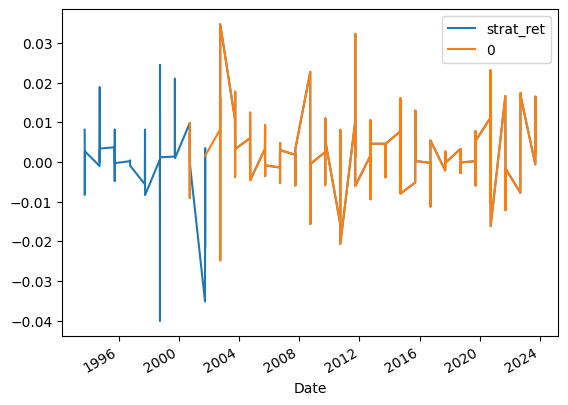

In [23]:
pd.concat([df1.loc[df1["active"], "strat_ret"], strat_ret[pos != 0.0]], axis=1).sort_index().plot()

## Describe Strategy

In [24]:
utils.describe(returns=strat_ret, pos=pos, daily=True, asset=TICKER)

C:\Users\tomw1\PycharmProjects\quantified_strategies\quantified_strategies\strategy_utils.py:169: RuntimeWarning: invalid value encountered in sqrt
  ann_adj_sharpe_ratio = sharpe_ratio * np.sqrt(252 * activity_ratio)
C:\Users\tomw1\PycharmProjects\quantified_strategies\quantified_strategies\strategy_utils.py:171: RuntimeWarning: invalid value encountered in sqrt
  ann_sortino_ratio = sortino_ratio * np.sqrt(252 * activity_ratio)


Asset                            SPY
Start                     2000-01-03
End                       2024-03-04
Mean Return                 0.26943%
Total Return                  35.86%
Median Return               0.21660%
1st Quartile               -0.30002%
3rd Quartile                0.81538%
Std Dev Return              0.99740%
CAGR                      26.453 bps
Trade CAGR                   -1.269%
Ann. CAGR                    94.590%
Activity Ratio                -1.91%
Number of Trades                24.0
Average Hold Period       -4.83 Days
Daily Sharpe Ratio            0.2701
Ann. Sharpe Ratio             4.2883
Adj. Ann. Sharpe Ratio           NaN
Daily Sortino Ratio           0.4592
Ann. Sortino Ratio               NaN
Daily Calmar Ratio            8.8019
Hit Ratio                     61.21%
Profit Factor                  2.11x
MDD                           -4.07%
MDD Start                 2002-09-23
MDD Bottom                2002-09-25
MDD End                   2003-09-19
M

In [25]:
utils.describe(returns=strat_ret.resample("YE").apply(lambda x: utils.get_cumulative_return(returns=x, total=True)), daily=False, asset=TICKER)

Asset                             SPY
Start                      2000-12-31
End                        2024-12-31
Mean Return                  1.25001%
Total Return                   35.86%
Median Return                1.06495%
1st Quartile                 0.08136%
3rd Quartile                 1.91707%
Std Dev Return               1.88739%
CAGR                      123.333 bps
Trade CAGR                        N/A
Ann. CAGR                         N/A
Activity Ratio                100.00%
Number of Trades                  0.0
Average Hold Period        25.00 Days
Daily Sharpe Ratio             0.6623
Ann. Sharpe Ratio             10.5136
Adj. Ann. Sharpe Ratio        10.5136
Daily Sortino Ratio            1.5671
Ann. Sortino Ratio            24.8771
Daily Calmar Ratio            17.0497
Hit Ratio                      76.00%
Profit Factor                   8.00x
MDD                            -2.10%
MDD Start                  2009-12-31
MDD Bottom                 2010-12-31
MDD End     

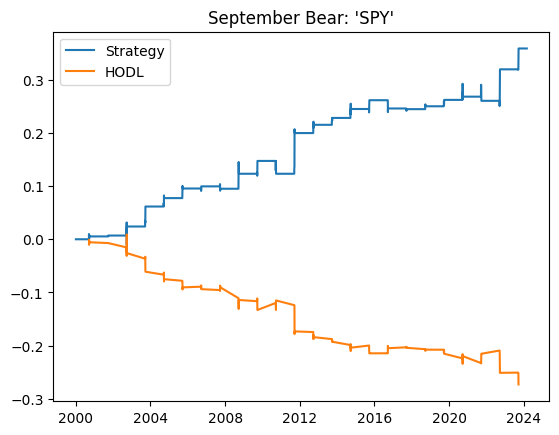

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(utils.get_cumulative_return(returns=strat_ret, total=False), label="Strategy")
ax.plot(utils.get_cumulative_return(returns=ret[pos != 0.0], total=False), label="HODL")

plt.title(f"September Bear: {TICKER!r}")
plt.legend(loc="best")
plt.show()